In [15]:
import pandas as pd  
from scan_spectrolyser import scan_helpers
from scan_spectrolyser import no3_calibrations
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dobson81624 = scan_helpers.import_scan_fp('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-16-24 Reynolds Visit/2024-08-16_14-31-14.fp')
dobson81624

,Date/Time,200.00,202.50,205.00,207.50,210.00,212.50,215.00,217.50,220.00,...,727.50,730.00,732.50,735.00,737.50,740.00,742.50,745.00,747.50,750.00
0,2024-08-16 14:31:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.395,...,0.703,0.664,0.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-08-16 14:46:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.023,...,0.496,0.469,0.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-08-16 15:01:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.914,...,0.500,0.449,0.426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-08-16 15:16:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.828,...,0.461,0.379,0.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-08-16 15:31:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.172,...,0.445,0.391,0.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,2024-08-27 09:16:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.465,...,2.457,2.379,2.281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,2024-08-27 09:31:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.367,...,2.410,2.297,2.223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,2024-08-27 09:46:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.375,...,2.426,2.367,2.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,2024-08-27 10:01:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.395,...,2.387,2.281,2.246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dobson81624 = scan_helpers.apply_calibrations(dobson81624, [no3_calibrations.one_wavelength, no3_calibrations.two_wavelength, no3_calibrations.second_derivative], {no3_calibrations.second_derivative: {'slope': 41.42, 'intercept': 1.03}, no3_calibrations.two_wavelength: {'slope': 3.69, 'intercept': -.98}, no3_calibrations.one_wavelength: {'slope': 3.26, 'intercept': 0.33}})
dobson81624['two_wavelength_no3_mgl'] = dobson81624['two_wavelength_no3'] * 14/1000
dobson81624['one_wavelength_no3_mgl'] = dobson81624['one_wavelength_no3'] * 14/1000
dobson81624['second_derivative_no3_mgl'] = dobson81624['second_derivative_no3'] * 14/1000

# Nitrate Plotting

<Axes: title={'center': 'Nitrate Dobson 8/16/24 - 8/27/24'}, xlabel='Time', ylabel='NO3 Concentration (mg/L)'>

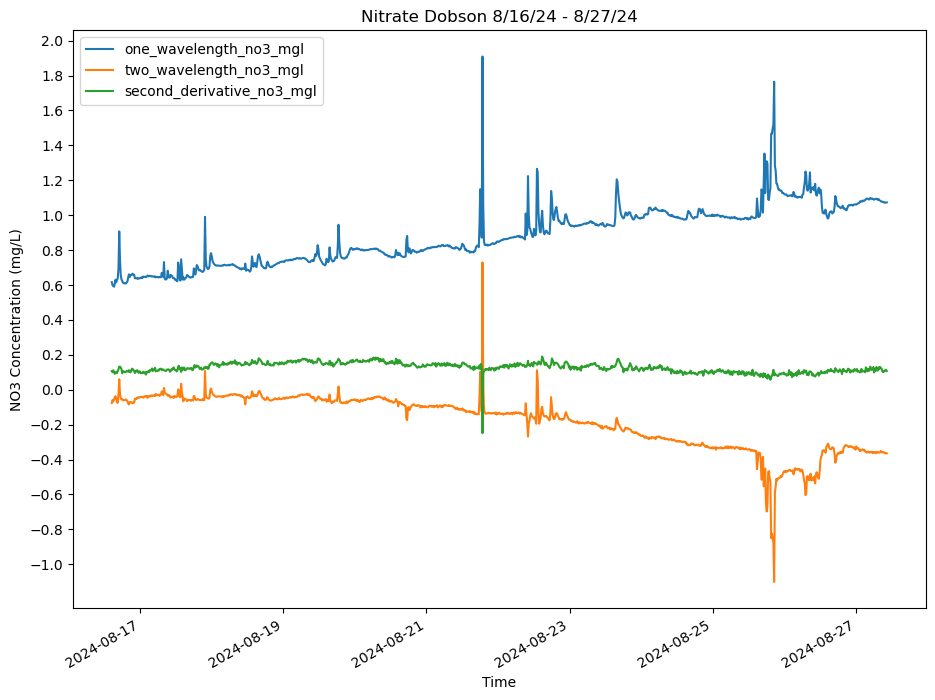

In [18]:
dobson81624.plot(x='Date/Time', y=['one_wavelength_no3_mgl', 'two_wavelength_no3_mgl', 'second_derivative_no3_mgl'], title='Nitrate Dobson 8/16/24 - 8/27/24', ylabel='NO3 Concentration (mg/L)', xlabel='Time', legend=True, figsize=(11,8.5), yticks=np.arange(-1, 2.2, .2))

- second derivative the clear winner here: stable output for the whole period. so its probably pretty right.
- one wavelength drifted positive, two wavelength drifted negative: suggests maybe some fouling if absorbtion is drifting positive? Make another graph to check
- two wavelength is negative mostly. either need a different wavelength or alpha

# Wavelength Plotting

<Axes: title={'center': 'Absorption at Dobson, 8/16/24 - 8/27/24'}, xlabel='Time', ylabel='Absorption (AU)'>

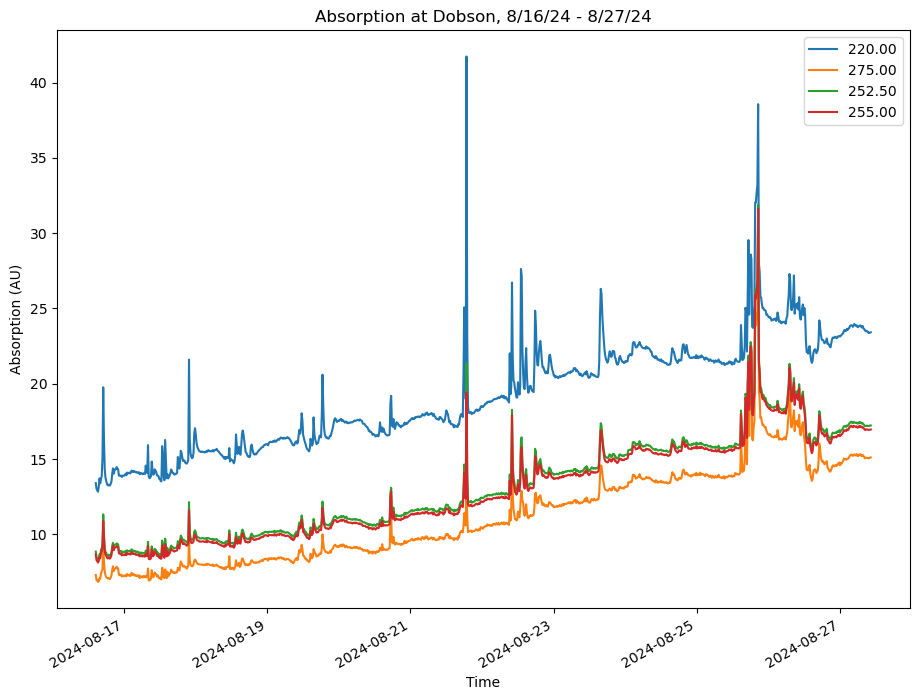

In [19]:
dobson81624.plot(x='Date/Time', y=['220.00', '275.00', '252.50', '255.00'], title='Absorption at Dobson, 8/16/24 - 8/27/24', ylabel='Absorption (AU)', xlabel='Time', legend=True, figsize=(11,8.5))

In [20]:
dobson81624.to_excel('/Users/beneck/Library/CloudStorage/OneDrive-NortheasternUniversity/Boise Project/Data/8-16-24 Reynolds Visit/2024-08-16_14-31-14_processed.xlsx')